## 📌 7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.

In [57]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
# Google Colab에서 한글 폰트 설정하기
!pip install -q matplotlib
!pip install -q --upgrade matplotlib
!pip install -q koreanize-matplotlib

import koreanize_matplotlib

**make_moons 함수를 사용하여 데이터셋 생성**

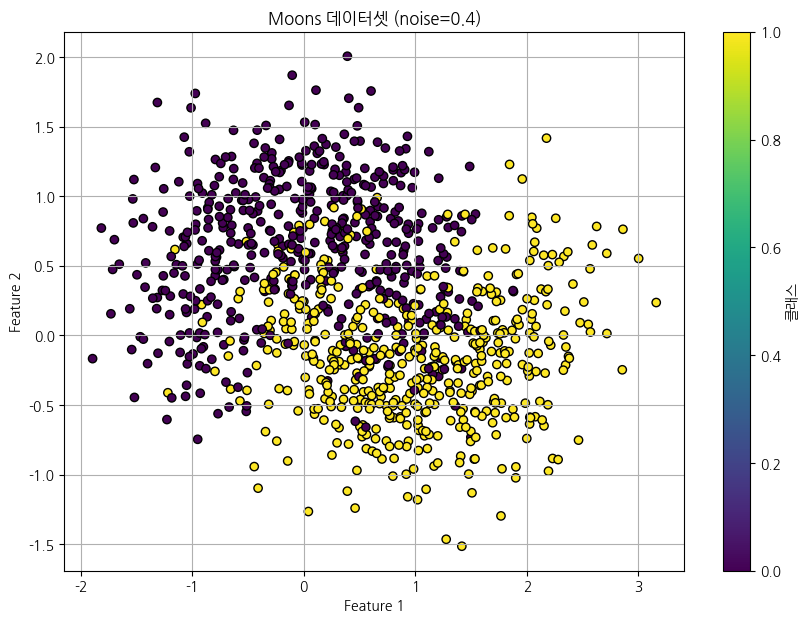

In [4]:
# n_samples: 생성할 샘플의 수 (1000개)
# noise: 데이터에 추가할 노이즈의 정도 (0.4)
# random_state: 재현성을 위한 랜덤 시드 값
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Moons 데이터셋 (noise=0.4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='클래스')
plt.grid(True)
plt.show()

**데이터를 훈련 세트와 테스트 세트로 분할**

In [5]:
# test_size: 테스트 세트의 비율 (전체 데이터의 20%)
# random_state: 재현성을 위한 랜덤 시드 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"훈련 세트 크기: {X_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}")

훈련 세트 크기: (800, 2)
테스트 세트 크기: (200, 2)


**GridSearchCV를 사용하여 최적의 매개변수 찾기**

In [6]:
# DecisionTreeClassifier의 max_leaf_nodes 매개변수에 대해 그리드 서치 수행
# max_leaf_nodes: 결정 트리의 최대 리프 노드 수
# cross-validation(cv): 교차 검증 횟수
param_grid = {
    'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 50, 100],
    'min_samples_split': [2, 5, 10]
}

# 결정 트리 분류기 초기화
tree_clf = DecisionTreeClassifier(random_state=42)

# 그리드 서치 객체 생성
# scoring: 최적화할 평가 지표
# cv: 교차 검증 폴드 수
# n_jobs: 병렬 실행을 위한 CPU 코어 수 (-1은 모든 코어 사용)
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 매개변수와 해당 점수 출력
print(f"최적의 매개변수: {grid_search.best_params_}")
print(f"최고 교차 검증 점수: {grid_search.best_score_:.4f}")

최적의 매개변수: {'max_leaf_nodes': 5, 'min_samples_split': 2}
최고 교차 검증 점수: 0.8487


**최적의 매개변수로 모델 훈련 및 평가**

In [7]:
# 최적의 매개변수를 사용하여 결정 트리 분류기 생성
best_tree_clf = DecisionTreeClassifier(
    max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

# 전체 훈련 세트로 모델 훈련
best_tree_clf.fit(X_train, y_train)

# 테스트 세트에서 예측 수행
y_pred = best_tree_clf.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 세트에서의 정확도: {accuracy:.4f} ({accuracy * 100:.2f}%)")

테스트 세트에서의 정확도: 0.8550 (85.50%)


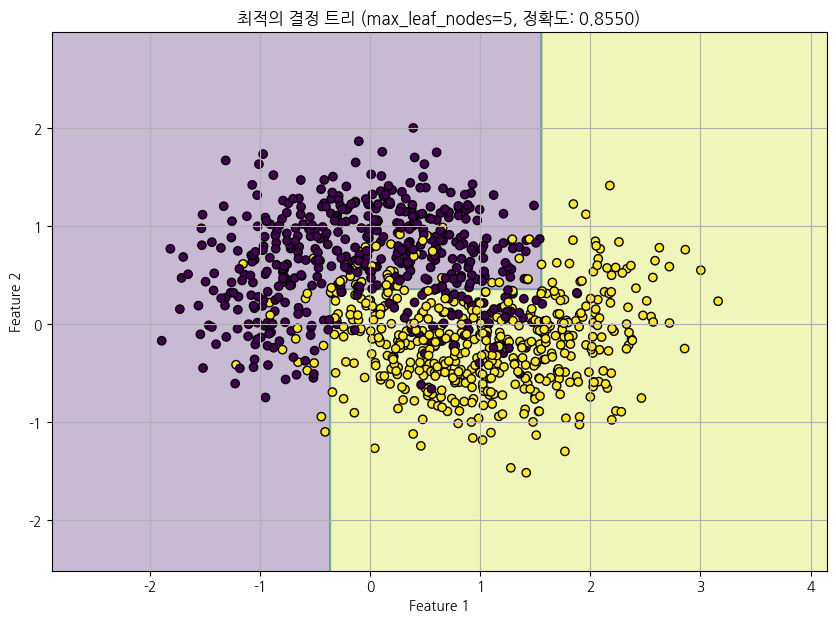

In [8]:
# 결정 경계 시각화 함수
def plot_decision_boundary(clf, X, y, title):
    # 메쉬 그리드 생성
    h = 0.02  # 메쉬 그리드의 스텝 크기
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 메쉬 그리드의 모든 점에 대해 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# 최적의 결정 트리의 결정 경계 시각화
plot_decision_boundary(best_tree_clf, X, y, f'최적의 결정 트리 (max_leaf_nodes={grid_search.best_params_["max_leaf_nodes"]}, 정확도: {accuracy:.4f})')

## 📌 8. 랜덤 포레스트를 만들어보세요.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [74]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# 결정 트리 분류기 초기화
best_params = {'max_leaf_nodes': 5, 'min_samples_split': 2}
tree_clf = DecisionTreeClassifier(
    max_leaf_nodes=best_params['max_leaf_nodes'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# 모델 훈련
tree_clf.fit(X_train, y_train)

# 테스트 세트 예측 및 성능 평가
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"단일 결정 트리 테스트 정확도: {accuracy_tree:.4f} ({accuracy_tree * 100:.2f}%)")

단일 결정 트리 테스트 정확도: 0.8550 (85.50%)


**ShuffleSplit을 사용하여 훈련 세트에서 1,000개의 서브셋 생성**

In [77]:
# a. 1,000개의 서브셋 생성
n_trees = 1000
n_samples = 100
mini_sets = []

# ShuffleSplit 설정: 훈련 데이터에서 100개씩, 1000번 반복
ss = ShuffleSplit(n_splits=n_trees, train_size=n_samples, random_state=42)

# 서브셋을 생성해 mini_sets에 추가
for mini_train_idx, _ in ss.split(X_train):
    X_mini_train = X_train[mini_train_idx]
    y_mini_train = y_train[mini_train_idx]
    mini_sets.append((X_mini_train, y_mini_train))

print(f"생성된 서브셋 개수: {len(mini_sets)}")
print(f"각 서브셋 크기: {mini_sets[0][0].shape}")

생성된 서브셋 개수: 1000
각 서브셋 크기: (100, 2)


**각 서브셋에 대해 결정 트리 훈련 및 예측 수집**

In [78]:
# 모든 결정 트리의 예측 결과를 담을 배열 (1000개의 트리 x 테스트 샘플 수)
predictions = np.empty((n_trees, len(X_test)), dtype=np.uint8)

tree_params = {
    'max_leaf_nodes': 15,
    'min_samples_split': 2,
    'max_features': 'sqrt'
}

# 각 서브셋마다 결정 트리를 훈련시키고 예측값을 저장
for tree_idx, (X_mini_train, y_mini_train) in enumerate(mini_sets):
    # 각 트리마다 다른 랜덤 시드 사용 (추가 다양성)
    tree_clf = DecisionTreeClassifier(
        max_leaf_nodes=tree_params['max_leaf_nodes'],
        min_samples_split=tree_params['min_samples_split'],
        max_features=tree_params['max_features'],
        random_state=tree_idx
    )

    # 모델 훈련
    tree_clf.fit(X_mini_train, y_mini_train)

    # 테스트 세트에 대한 예측
    y_pred = tree_clf.predict(X_test)
    predictions[tree_idx] = y_pred

**다수결 예측 계산**

In [82]:
# 다수결 예측 계산 (axis=0 기준으로 각 샘플에 대한 최빈값 계산)
majority_votes, _ = mode(predictions, axis=0, keepdims=False)

In [85]:
# 다수결 예측 평가
majority_votes = majority_votes.flatten()  # 차원 축소
rf_accuracy = accuracy_score(y_test, majority_votes)

print(f"단일 결정 트리 정확도: {accuracy_tree:.4f} ({accuracy_tree * 100:.2f}%)")
print(f"랜덤 포레스트 정확도: {rf_accuracy:.4f} ({rf_accuracy * 100:.2f}%)")

단일 결정 트리 정확도: 0.8550 (85.50%)
랜덤 포레스트 정확도: 0.8500 (85.00%)


**추가 성능 개선**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 사이킷런의 RandomForestClassifier를 사용한 그리드 서치
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"최적의 RandomForest 파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 점수: {grid_search.best_score_:.4f}")

# 최적 파라미터로 모델 훈련
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)

print(f"단일 결정 트리 정확도: {accuracy_tree:.4f} ({accuracy_tree * 100:.2f}%)")
print(f"기본 랜덤 포레스트 정확도: {rf_accuracy:.4f} ({rf_accuracy * 100:.2f}%)")
print(f"최적화된 랜덤 포레스트 정확도: {best_rf_accuracy:.4f} ({best_rf_accuracy * 100:.2f}%)")

최적의 RandomForest 파라미터: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
최고 교차 검증 점수: 0.8538
단일 결정 트리 정확도: 0.8550 (85.50%)
기본 랜덤 포레스트 정확도: 0.8500 (85.00%)
최적화된 랜덤 포레스트 정확도: 0.8450 (84.50%)
